#Proyecto Módulo 5 - Redes Neuronales

###Presentado por:
* Sebastian Rendón Patiño
* Andrés Felipe Aristizábal Miranda

---
Conjunto de datos.
[Chest X-Ray Images (Pneumonia) with new class](https://www.kaggle.com/datasets/ahmedhaytham/chest-xray-images-pneumonia-with-new-class?rvi=1)

## **1. Marco de Proyecto**
---

Normalmente, se suele construir un marco de proyecto para mostrar los resultados del entendimiento del negocio, es decir, debemos dar respuesta a los siguientes elementos:

### **1.1. Trasfondo del Negocio**
---

- ¿Quién es el cliente o los beneficiarios del proyecto? ¿En qué dominio se encuentran (marketing, medicina, entre otros)?
- ¿Qué problemas del negocio o del dominio estamos tratando de solucionar?


El cliente o los beneficiarios del proyecto son los profesionales médicos y los pacientes que puedan tener neumonía, ya que el proyecto se encuentra en el dominio de la medicina, específicamente en el área de reconocimiento de imágenes de rayos X.

El problema del negocio o del dominio que se está tratando de solucionar es la detección y clasificación automatizada de enfermedades humanas a partir de imágenes médicas con rayos X, específicamente radiografías de tórax en este caso. Esto tiene varios beneficios, como la mejora de la eficiencia en el diagnóstico médico, la identificación temprana de enfermedades, la reducción de errores humanos y la posibilidad de proporcionar un tratamiento más rápido y eficaz a los pacientes. Además, puede ayudar en la investigación médica y en la toma de decisiones clínicas, lo que puede llevar a una mejor atención médica en general.

### **1.2. Alcance**
---

- ¿Qué  solución basada en _Deep Learning_ queremos implementar?
- ¿Qué  se hará?
- ¿De qué forma el cliente o beneficiario utilizará el producto del proyecto?

La solución basada en Deep Learning que se quiere implementar es un sistema de detección y clasificación automatizada de enfermedades a partir de imágenes de radiografías de tórax.

Lo que se hará es desarrollar un modelo de Deep Learning que pueda analizar las imágenes de radiografías de tórax y detectar la presencia de enfermedades como la neumonía bacteriana y viral, así como identificar radiografías de personas que no posean la enfermedad. El modelo se entrenará utilizando un conjunto de datos que contiene ejemplos de estas categorías, y una vez que esté entrenado, podrá analizar nuevas radiografías y clasificarlas en una de las tres categorías mencionadas.

El cliente o beneficiario, en este caso, serán los profesionales médicos y los pacientes. Los profesionales médicos podrán utilizar el producto del proyecto como una herramienta de apoyo en el diagnóstico, lo que les permitirá agilizar el proceso de revisión de radiografías y tomar decisiones más informadas sobre el tratamiento de los pacientes. Los pacientes se beneficiarán al recibir diagnósticos más precisos y, en algunos casos, más rápidos, lo que puede llevar a un tratamiento más efectivo y mejores resultados de salud en general.

### **1.3. Plan**
---

Puede agregar una lista de actividades con tiempos estimados, un diagrama de Gantt o integrar alguna herramienta de gestión de proyectos para mostrar la planeación del proyecto.

---

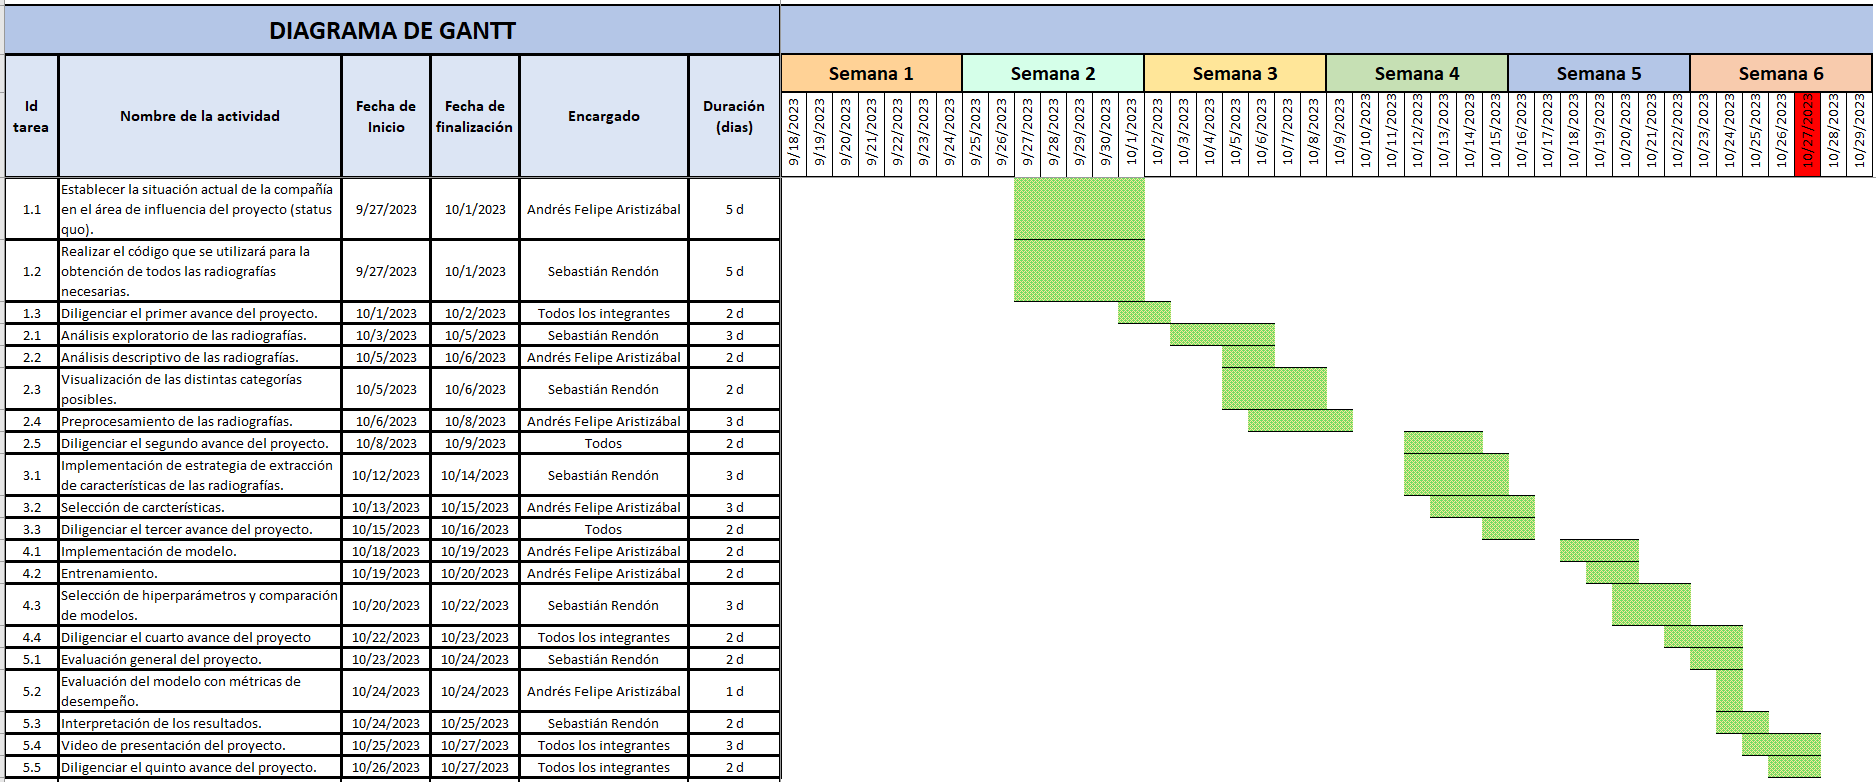

## **2. Datos**
---

En esta sección debe adjuntar una descripción de los datos y agregar el código que permite su tratamiento.

### **2.1. Origen**
---

- ¿De dónde vienen los datos?
- ¿Se usa alguna herramienta o proceso para la descarga de la información?
- ¿Qué tipo de datos estamos manejando?

El conjunto de datos proviene de [kaggle](https://www.kaggle.com/datasets/ahmedhaytham/chest-xray-images-pneumonia-with-new-class), el cual contiene un conjunto de imágenes divididas en 3 segmentos
* Train
* Test
* Val

Cada una de las carpetas contiene 3 nuevas carpetas donde se encuentran las imágenes divididas en:
* Normal
* Virus
* Bacteria

de esta manera y teniendo el conjunto de datos balanceado, podemos proceder al respectivo etiquetado de las mismas.

El tipo de datos para el desarrollo del proceso es No Estructurado, por lo cual, se hace necesario realizar un preprocesamiento de datos y conversión de los mismos, de manera que pueda usarse en series de numpy optimizando el entrenamiento del modelo posterior.

In [ ]:
!wget --no-cache -O x-rays.zip.npy -q "https://drive.google.com/uc?export=download&id=1It4NYRJNEem3YLHJqYZyclUbR85eqZH8"

In [ ]:
!pip install opencv-python

In [ ]:
from tqdm import tqdm
import os
import pandas as pd
import tensorflow as tf
#from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
from glob import glob
import sklearn
import skimage
from skimage.transform import resize
import random
from cv2.gapi import RGB2Gray
from skimage.color import rgb2gray
import pdb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **2.2. Carga o Adquisición de Datos**
---

De manera temporal los datos seran cargados de manera manual debido al peso de los archivos, se hace complicado descargarlos directamente, razon por la cual se suben a un Google Drive y se comparte vinculo

Link a los Archivos .npy que contienen los datos de las imagenes preprocesados, se realiza de esta forma para simplificar el procesamiento de los mismos
* [xtest](https://drive.google.com/uc?export=download&id=17tTIHqqs0xR5M_8eKyrF-KNn9aAefmb9)
* [ytest](https://drive.google.com/uc?export=download&id=1TGew2iO1PBc1iJrZWzg3BahLYgwldCxTg)
* [xtrain](https://drive.google.com/uc?export=download&id=1Fs_Cjy8X_wKuH-OI8cjS7tPN3fps-AIf)
* [ytrain](https://drive.google.com/uc?export=download&id=1LlQtTnyRvXv3sH0KahvUw5IuluZzbVQC)

Conjuto de imagnes
* [Conjunto de Imágenes](https://drive.google.com/file/d/1It4NYRJNEem3YLHJqYZyclUbR85eqZH8/view?usp=sharing)

#### 2.2.1 Instalación e importación de librerias

La siguiente función solo opera de forma local lo cual facilita la obtención de las imágenes, a partir de un archivo llamado x-rays.zip y el cual contiene los directorios con las imágenes de rayos x, debidamente clasificados.

In [ ]:
import zipfile

# Ruta al archivo .zip que deseas descomprimir
archivo_zip = './drive/MyDrive/Diplomado En Machine Learning/Módulo 5 - Redes Neuronales/Proyecto Aplicado/x-rays.zip'

# Directorio de destino donde se descomprimirán los archivos (la misma carpeta)
directorio_destino = '/content/'

# Abre el archivo .zip
with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    # Extrae todos los archivos en el directorio de destino
    zip_ref.extractall(directorio_destino)

print(f'Archivos descomprimidos en: {directorio_destino}')

Archivos descomprimidos en: /content/


#### 2.2.2 Descomprimiento archivo .zip
Se realiza proceso de descompresión de imágenes de rayos x

In [ ]:
files = os.listdir("./Data_blance")

# Imprimir el contenido de la carpeta

for file in files:
    print(file)

Test
Val
Train


####2.2.3 Preprocesamiento y ejecución de imágenes

La siguiente funcion opera de la siguiente manera, luego de tener descomprimido el archivo x-rays.zip, el contenido es una carpeta de nombre Data_blance, con el contenido de directorios debidamente distribuido por Test, Train y Val
y el contenido de cada una de las carpetas es Normal, bacteria y virus.

-----
 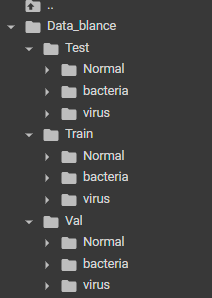

 -------
De esta forma, la función realiza un ciclo por cada una de las carpetas, de manera que valida el nombre de cada una para determinar al tipo que pertenece
de acuerdo a esto, se genera un arreglo donde el 0 corresponde a imágenes de tipo bacteria, 1 corresponde a imágenes de tipo Normal y 2 corresponde a imágenes de tipo virus, seguido para cada una de las imágenes se realiza Redimensión de cada una de las imágenes a 150x150 píxeles con 3 canales de color (RGB), Convierten las imágenes a escala de grises. Y se almacenan las imágenes en escala de grises como un arreglo NumPy para su procesamiento posterior.

Finalmente se guardan los arreglos de numpy con los nombres
* xtest.npy
* ytest.npy
* xtrain.npy
* ytrain.npy



In [ ]:
train_dir = "Data_blance/Train"
test_dir = "Data_blance/Test"

load_from_images = True

def get_data(folder):
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['bacteria']:
                label = 0
            elif folderName in ['Normal']:
                label = 1
            elif folderName in ['virus']:
                label = 2
            else:
                label = 3
            for image_filename in tqdm(os.listdir(folder + '/' + folderName)):
                img_file = cv2.imread(folder + '/' + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (150,150,3), mode='constant')
                    img_file = rgb2gray(img_file)
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)

    return X, y

if load_from_images:
    X_train, y_train = get_data(train_dir)
    X_test, y_test = get_data(test_dir)

    np.save('xtrain.npy', X_train)
    np.save('ytrain', y_train)
    np.save('xtest.npy', X_test)
    np.save('ytest', y_test)
else:
    X_train = np.load('xtrain.npy')
    y_train = np.load('ytrain.npy')
    X_test = np.load('xtest.npy')
    y_test = np.load('ytest.npy')

100%|██████████| 100/100 [00:17<00:00,  5.87it/s]


#### 2.2.4 Generar vista previa

Para finalizar el punto podemos ver una vista previa de la imagen de rayos x y una distribución de los píxeles de la imagen. Con el fin de ir haciendo una idea general de como se preprocesaron los datos.

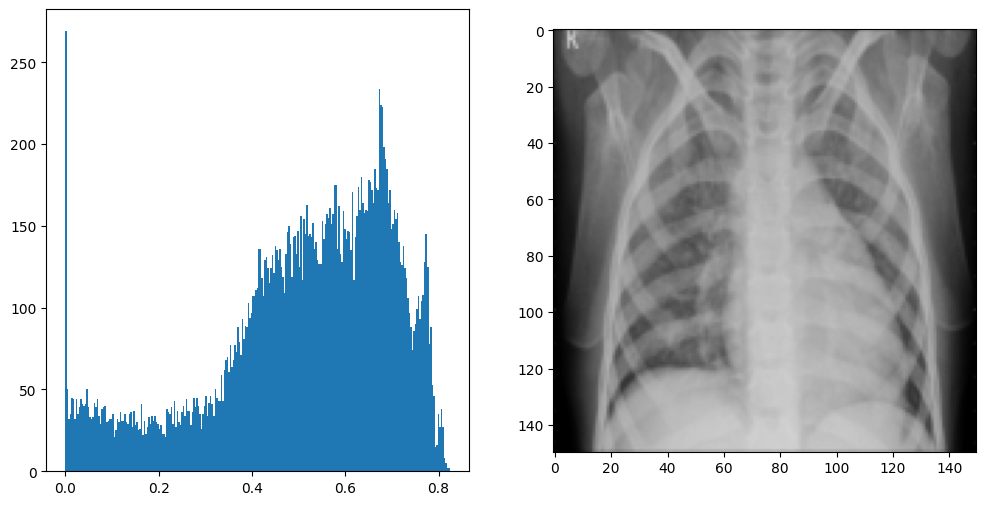

In [ ]:
def plotHistogram(a):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.hist(a.ravel(), bins= 255)
    plt.subplot(1,2,2)
    plt.imshow(a, cmap='gray', vmin=0, vmax=1)
    plt.show()
plotHistogram(X_train[30])

####2.2.5 Vista previa por tipo

Como parte del proceso se realiza la impresión de 3 imágenes al azar para cada una de las categorías, Normal, Bacteria y Virus, a fin de establecer o determinar visualmente como es el aspecto de cada una de ellas, y que elementos diferencian las clases entre sí.

---

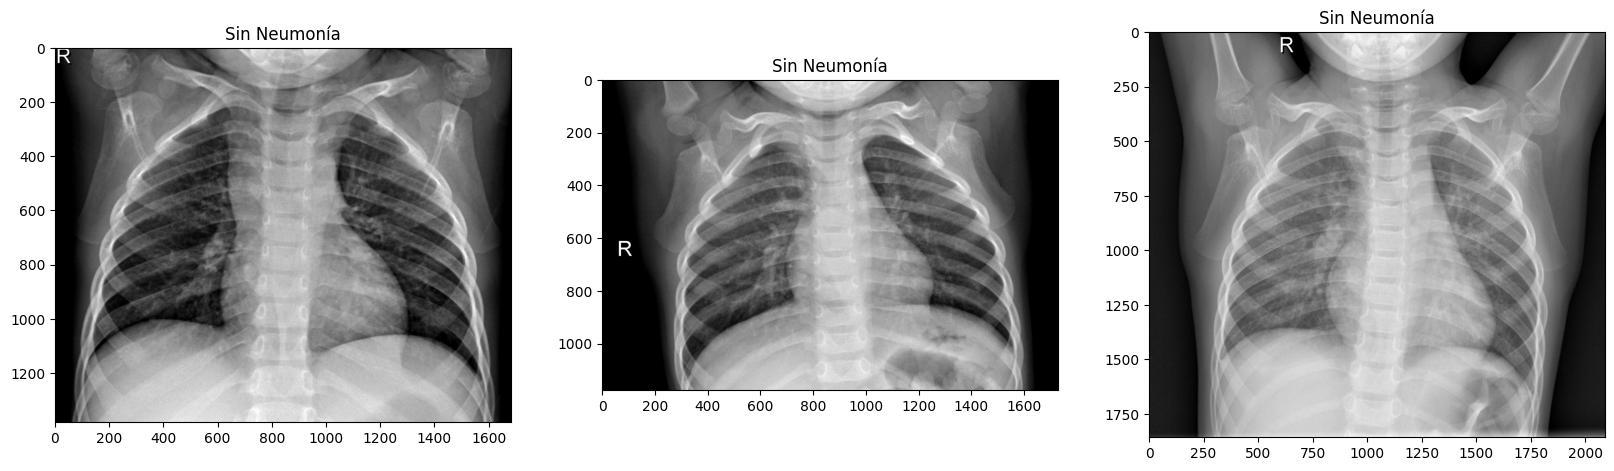

In [ ]:
multiple_images = glob("./Data_blance/Train/Normal/**")
def plot_three_images(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.title("Sin Neumonía")
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.title("Sin Neumonía")
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.title("Sin Neumonía")
    plt.imshow(cv2.imread(r[2]))
plot_three_images(multiple_images)

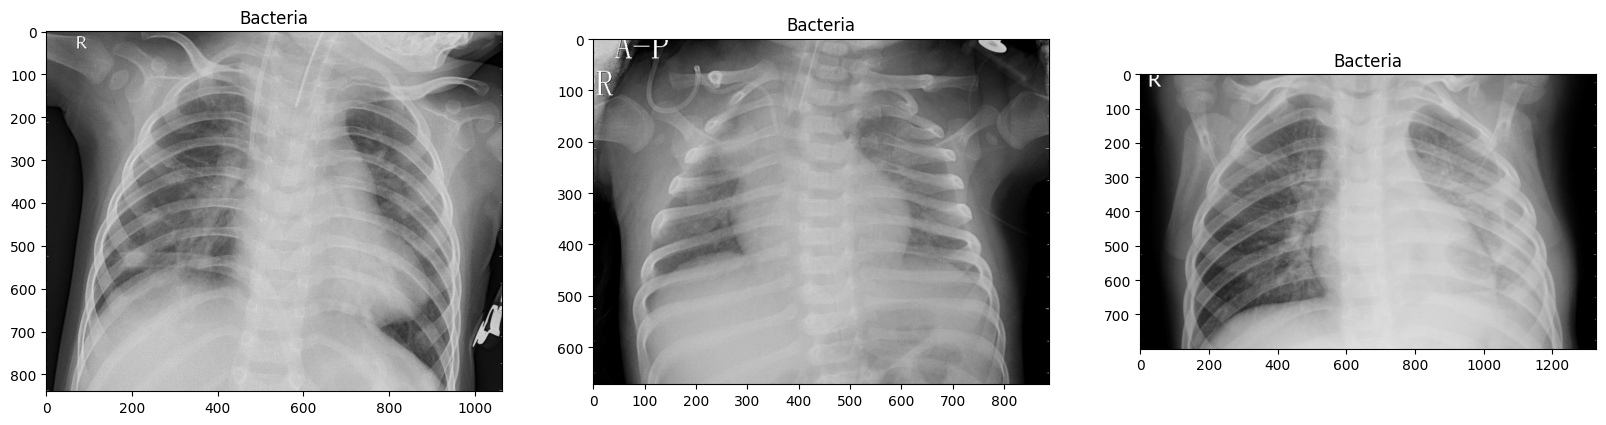

In [ ]:
multiple_images = glob("./Data_blance/Train/bacteria/**")
def plot_three_images(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.title("Bacteria")
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.title("Bacteria")
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.title("Bacteria")
    plt.imshow(cv2.imread(r[2]))
plot_three_images(multiple_images)

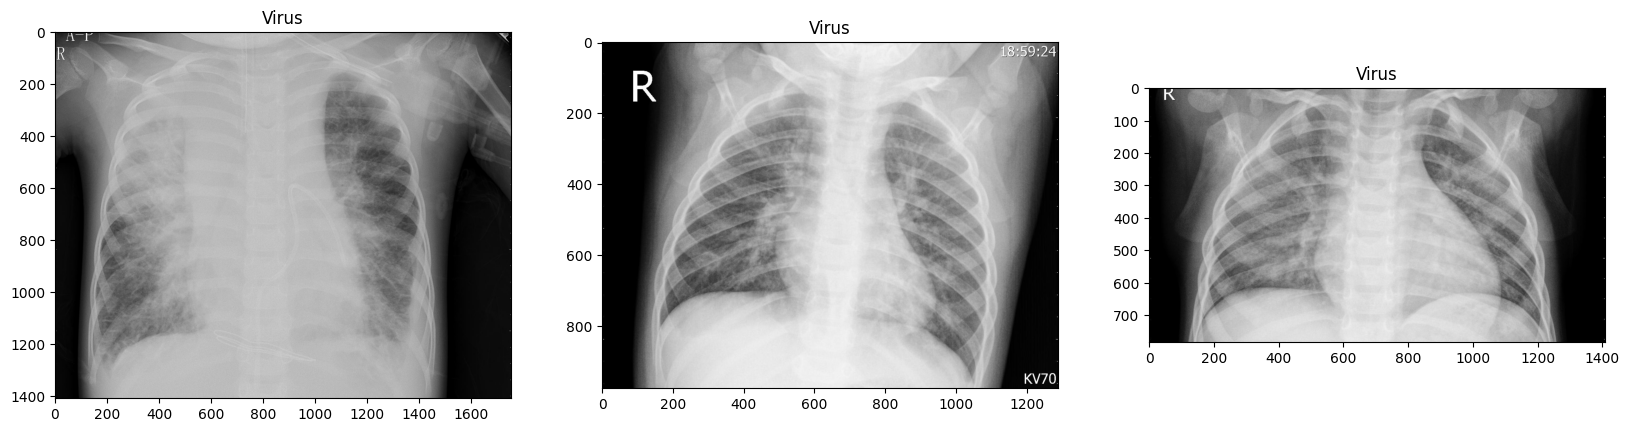

In [ ]:
multiple_images = glob("./Data_blance/Train/virus/**")
def plot_three_images(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.title("Virus")
    plt.imshow(cv2.imread(r[0]))
    plt.subplot(132)
    plt.title("Virus")
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.title("Virus")
    plt.imshow(cv2.imread(r[2]))
plot_three_images(multiple_images)

## **3. Selección y diseño de modelos**
---

Seleccione el/los modelo/s a explorar para aplicar sobre el conjunto de datos. Recuerde, la selección del modelo está influenciada por diferentes factores. Si el problema es de análisis de imagen, muy seguramente hay que explorar diversas redes neuronales convolucionales. Si el problema está relacionado con NLP, muy seguramente hay que explorar modelos basados en Tranformers.

Además, debe definir cuál es su problema:

- **Regresión**: se busca estimar un valor continúo a partir de los datos.
- **Clasificación**: permite estimar un valor categórico a partir de los datos.
- **Agrupamiento**: permite encontrar grupos de datos similares.
- **Otros modelos**: recuerde que dispone de otros tipos de tareas supervisadas y no supervisadas.

En cualquier caso los profundos disponibles en _TensorFlow_ constituyen una base sobre la que usted debe definir un clasificador/regresor/_encoder_/_decoder_ final, compuesto de una o más capas densas, con opción de incluir _dropout_ o capas de normalización.

Justifique la escogencia y diseño de los modelos a explorar:


Selección del Modelo:

* Tipo de Problema: El código está diseñado para resolver un problema de clasificación. La red neuronal convolucional es una elección apropiada para problemas de clasificación de imágenes, ya que estas redes han demostrado ser altamente efectivas en tareas de visión por computadora.

* Arquitectura CNN: La arquitectura definida es una típica CNN con capas de convolución, capas de max-pooling y capas totalmente conectadas al final. La elección es adecuada para procesar imágenes, ya que las capas de convolución pueden aprender características importantes de las imágenes.

* Regularización: Se ha incorporado regularización L2 en las capas completamente conectadas para evitar el sobreajuste. Esto es una buena práctica para controlar la complejidad del modelo y generalizar mejor a datos no vistos.

* Función de Activación: La función de activación 'relu' se utiliza en las capas convolucionales para introducir no linealidad en la red y ayudar en la extracción de características. La función 'softmax' se utiliza en la capa de salida para generar probabilidades de clases.

Diseño de la Arquitectura:

* Capas Convolucionales y Max-Pooling: Se utilizan múltiples capas de convolución y max-pooling para aprender y reducir gradualmente las características de las imágenes. Esto ayuda a la red a detectar patrones relevantes a diferentes escalas.

* Capas Totalmente Conectadas: Después de las capas convolucionales, se aplana la salida y se pasan a través de capas completamente conectadas. Esto permite que la red aprenda representaciones finales y realice la clasificación.

* Dropout: Se utilizan capas de dropout para evitar el sobreajuste. Esto aleatoriza las activaciones de las neuronas y previene la dependencia excesiva de ciertas características.

* Número de Unidades en Capas Densas: El número de unidades en las capas densas se ha configurado en 516, pero este número puede ajustarse según las necesidades del problema y el tamaño del conjunto de datos.

En resumen, la arquitectura CNN definida es adecuada para tareas de clasificación de imágenes. La justificación se basa en las buenas prácticas comunes para resolver problemas de visión por computadora y el control del sobreajuste mediante la regularización y el dropout. Sin embargo, el rendimiento del modelo también dependerá de otros factores, como la calidad del conjunto de datos y la selección de hiperparámetros.

In [ ]:
dataxtest = X_test.shape
dataytest = y_test.shape
dataxtrain = X_train.shape
dataytrain = y_train.shape

print(f"Forma de X_test{dataxtest}")
print(f"Forma de y_test{dataytest}")
print(f"Forma de X_train{dataxtrain}")
print(f"Forma de y_Train{dataytrain}")

Forma de X_test(300, 150, 150)
Forma de y_test(300,)
Forma de X_train(3900, 150, 150)
Forma de y_Train(3900,)


In [ ]:
X_train = X_train.reshape(-1, 150, 150, 3)
X_val = X_val.reshape(-1, 150, 150, 3)
X_test = X_test.reshape(-1, 150, 150, 3)

In [ ]:
print(f"Forma de X_train {X_train.shape}")
print(f"Forma de y_Train {y_train.shape}")
print(f"Forma de X_test {X_test.shape}")
print(f"Forma de y_test {y_test.shape}")
print(f"Forma de X_val {X_val.shape}")
print(f"Forma de y_val {y_val.shape}")

Forma de X_train (3900, 150, 150, 3)
Forma de y_Train (3900,)
Forma de X_test (300, 150, 150, 3)
Forma de y_test (300,)
Forma de X_val (279, 150, 150, 3)
Forma de y_val (279,)


## **4. Implementación de los modelos**

### 4.1 Primer modelo sin transfer learning
### **2.1 Modelo propio**

Este modelo de red neuronal es una CNN (Convolutional Neural Network) diseñada para procesar imágenes de entrada con una resolución de 150x150 píxeles y 3 canales de color (RGB):

* Capas de Convolución y Max-Pooling: El modelo comienza con dos conjuntos de capas de convolución y max-pooling en cascada. Estas capas extraen características importantes de la imagen, como bordes y formas, mediante la convolución y luego reducen la dimensionalidad con el max-pooling. El número de filtros se duplica en cada conjunto de capas.

* Flatten: Después de las capas de convolución y max-pooling, se aplica una capa de aplanamiento (Flatten) para convertir los mapas de características en un vector unidimensional.

* Capas Densas (Fully Connected): A continuación, se agregan dos capas densas (fully connected) con 516 unidades cada una y funciones de activación ReLU. Estas capas son responsables de aprender patrones más abstractos y complejos a partir de las características extraídas en las capas anteriores.

* Dropout: Para evitar el overfitting, se aplican capas de dropout después de las capas densas. El dropout desactiva aleatoriamente un porcentaje de unidades en cada paso de entrenamiento para mejorar la generalización.

* Capa de Salida: Finalmente, el modelo tiene una capa de salida con 3 unidades y función de activación softmax. Esto es típico en problemas de clasificación con tres clases, donde la capa de salida produce probabilidades para cada clase.

* Regularización L2: El modelo aplica regularización L2 a las capas densas para penalizar los pesos de la red y evitar el overfitting.

En resumen, este modelo es una CNN con varias capas convolucionales seguidas de capas densas y técnicas de regularización para clasificar imágenes en una de tres clases. El modelo está diseñado para procesar imágenes de 150x150 píxeles y extraer características importantes de ellas. El uso de dropout y regularización L2 sugiere que se ha tenido en cuenta la prevención del overfitting durante el entrenamiento. El resumen del modelo muestra la estructura y la cantidad de parámetros en cada capa.



In [ ]:
import gc
tf.keras.backend.clear_session
gc.collect()

154

In [ ]:
# CONVOLUTION

entrada = LK.Input(shape=(150, 150, 3))
conv1 = LK.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(entrada)
conv2 = LK.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu')(conv1)
pool1 = LK.MaxPool2D(pool_size=(2,2), strides=(2,2))(conv2)

conv3 = LK.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(pool1)
conv4 = LK.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(conv3)
pool2 = LK.MaxPool2D(pool_size=(2,2), strides=(2,2))(conv4)

conv5 = LK.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(pool2)
conv6 = LK.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(conv5)
pool3 = LK.MaxPool2D(pool_size=(2,2), strides=(2,2))(conv6)


# FLATTEN

flat = LK.Flatten()(pool3)

# NEURONAL NETWORK

fc1 = LK.Dense(units=516, activation='relu', kernel_regularizer= tf.keras.regularizers.L2(0.01))(flat)
drop = LK.Dropout(0.35)(fc1)
fc2 = LK.Dense(units=516, activation='relu', kernel_regularizer= tf.keras.regularizers.L2(0.01))(drop)
drop1 = LK.Dropout(0.4)(fc2)

salida = LK.Dense(units=3, activation='softmax')(drop1)

# SUMMARY
gonodactylus_simithii = MK.Model(entrada, salida)
gonodactylus_simithii.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 150, 150, 8)       224       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 8)       584       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 75, 75, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 16)        1168      
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 16)        2320      
                                                           

Esta función se encarga de compilar un modelo de red neuronal. Utiliza el optimizador 'Adam', la función de pérdida 'sparse_categorical_crossentropy' para problemas de clasificación, y realiza un seguimiento de la métrica de precisión (accuracy). Además, define dos callbacks:

ModelCheckpoint: Guarda los mejores pesos del modelo en un archivo "best_Weights.h5" según la métrica "val_accuracy" en el conjunto de validación.
EarlyStopping: Detiene el entrenamiento si la métrica "val_accuracy" en el conjunto de validación no mejora durante 10 épocas y restaura los mejores pesos. Estos callbacks son útiles para monitorear y guardar el progreso del modelo durante el entrenamiento.

In [ ]:
# COMPILE MODEL
gonodactylus_simithii.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# CALLBACKS
best_callback = tf.keras.callbacks.ModelCheckpoint(
                                                      filepath="best_Weights.h5",
                                                      monitor="val_accuracy",
                                                      verbose=True,
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      mode="max"
                                                      )

stopping_callback = tf.keras.callbacks.EarlyStopping(
                                                      monitor="val_accuracy",
                                                      patience=10,
                                                      verbose=2,
                                                      mode="max",
                                                      restore_best_weights=True,
                                                      )

Aqui utilizamos los datos de Entreanmiento y validación

* X_train y y_train son los datos de entrenamiento, donde X_train son las características de entrada y y_train son las etiquetas o clases correspondientes.

* epochs=350 especifica la cantidad de épocas de entrenamiento. En este caso, el modelo se entrenará durante 350 épocas, lo que significa que pasará por todo el conjunto de entrenamiento 350 veces.

* batch_size=64 determina el tamaño del lote (batch) de ejemplos utilizados en cada paso de entrenamiento. En este caso, se están utilizando lotes de 64 ejemplos a la vez. Esto es común en el entrenamiento de redes neuronales para acelerar el proceso y mejorar la estabilidad.

* validation_data=(X_val, y_val) se refiere al conjunto de datos de validación, que se utiliza para evaluar el rendimiento del modelo después de cada época de entrenamiento. X_val son las características de validación y y_val son las etiquetas de validación.

* verbose=1 controla la cantidad de información que se muestra durante el entrenamiento. Con verbose=1, se muestra información detallada sobre el progreso del entrenamiento en cada época.

* callbacks=[best_callback, stopping_callback] son los callbacks que se utilizarán durante el entrenamiento. best_callback se encarga de guardar los mejores pesos del modelo en función de la métrica "val_accuracy" en el conjunto de validación. stopping_callback detiene el entrenamiento si la métrica "val_accuracy" no mejora durante 10 épocas y restaura los mejores pesos.

En resumen, este código realiza el entrenamiento de un modelo de red neuronal durante 350 épocas utilizando un tamaño de lote de 64 ejemplos. Se utiliza un conjunto de datos de validación para evaluar el rendimiento, y se aplican dos callbacks para guardar los mejores pesos y detener el entrenamiento en caso de falta de progreso en la métrica de validación.

In [ ]:
firstTraining = gonodactylus_simithii.fit(
                                            X_train, y_train,
                                            epochs=350,
                                            batch_size=64,
                                            validation_data=(X_val, y_val),
                                            verbose=1,
                                            callbacks=[best_callback, stopping_callback]
                                          )

Epoch 1/350
61/61 [==============================] - ETA: 0s - loss: 3.9782 - accuracy: 0.5038
Epoch 1: val_accuracy improved from -inf to 0.67384, saving model to best_Weights.h5
61/61 [==============================] - 20s 82ms/step - loss: 3.9782 - accuracy: 0.5038 - val_loss: 1.0996 - val_accuracy: 0.6738
Epoch 2/350
61/61 [==============================] - ETA: 0s - loss: 0.9376 - accuracy: 0.7046
Epoch 2: val_accuracy improved from 0.67384 to 0.69534, saving model to best_Weights.h5
61/61 [==============================] - 2s 40ms/step - loss: 0.9376 - accuracy: 0.7046 - val_loss: 0.7896 - val_accuracy: 0.6953
Epoch 3/350
61/61 [==============================] - ETA: 0s - loss: 0.7543 - accuracy: 0.7410
Epoch 3: val_accuracy improved from 0.69534 to 0.74552, saving model to best_Weights.h5
61/61 [==============================] - 2s 40ms/step - loss: 0.7543 - accuracy: 0.7410 - val_loss: 0.7906 - val_accuracy: 0.7455
Epoch 4/350
61/61 [==============================] - ETA: 0s - 

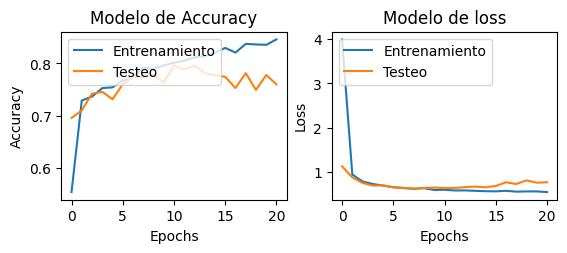

10/10 [==============================] - 1s 130ms/step


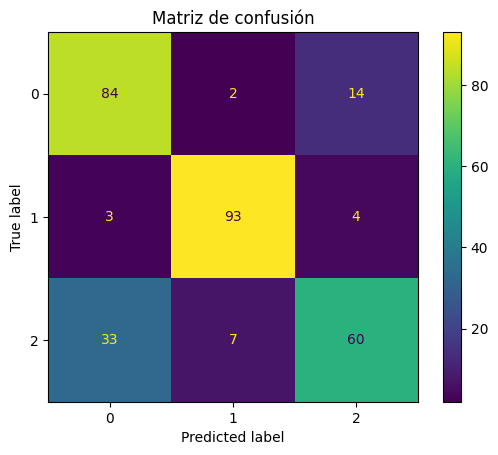

10/10 [==============================] - 2s 162ms/step


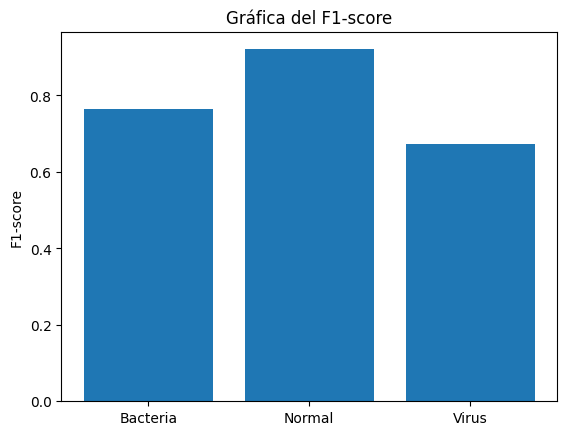

10/10 [==============================] - 2s 201ms/step


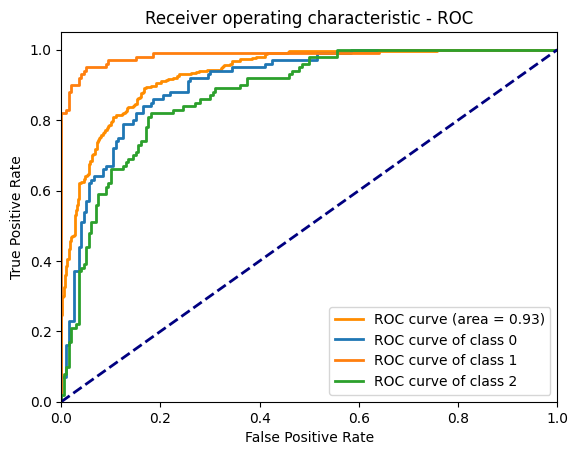

In [ ]:
# GRÁFICO DE ACCURACY
plt.subplot(2, 2, 1)
plt.plot(firstTraining.history['accuracy'])
plt.plot(firstTraining.history['val_accuracy'])
plt.title("Modelo de Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')

#-------------------------------------------------------------------------------

# GRÁFICO DE LOSS
plt.subplot(2, 2, 2)
plt.plot(firstTraining.history['loss'])
plt.plot(firstTraining.history['val_loss'])
plt.title("Modelo de loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')
plt.show()

#-------------------------------------------------------------------------------

# GRÁFICO DE MATRIZ DE CONFUSIÓN
y_pred_CM = gonodactylus_simithii.predict(X_test)
result = confusion_matrix(y_test, y_pred_CM.argmax(axis=1))
disp = ConfusionMatrixDisplay(result)
disp.plot()
plt.title("Matriz de confusión")
plt.show()

#-------------------------------------------------------------------------------

#GRÁFICO DE F1

y_pred_F1 = gonodactylus_simithii.predict(X_test)
y_pred_F1 = np.argmax(y_pred_F1, axis=1)
report = classification_report(y_test, y_pred_F1, output_dict=True)

# Obtener las métricas de interés
f1_score = [report[str(i)]['f1-score'] for i in range(3)]

fig, ax = plt.subplots()
ax.bar(range(3), f1_score)
ax.set_xticks(range(3))
ax.set_xticklabels(['Bacteria', 'Normal', 'Virus'])
ax.set_ylabel('F1-score')
ax.set_title('Gráfica del F1-score')
plt.show()

#-------------------------------------------------------------------------------

#GRÁFICO DE ROC AUC
y_pred_ROCAUC = gonodactylus_simithii.predict(X_test)
y_test_binario = to_categorical(y_test)

# Calcula la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binario[:, i], y_pred_ROCAUC[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcula la curva ROC micro
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binario.ravel(), y_pred_ROCAUC.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Grafica la curva ROC
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
for i in range(3):
    plt.plot(fpr[i], tpr[i], lw=lw,
             label="ROC curve of class {}".format(i))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - ROC')
plt.legend(loc="lower right")
plt.show()

In [ ]:
loss, acc = gonodactylus_simithii.evaluate(X_test, y_test, verbose=1)
print("The loss is: {0}, and the accuracy is: {1}".format(loss, acc))

10/10 [==============================] - 1s 24ms/step - loss: 0.6241 - accuracy: 0.7833
The loss is: 0.6240734457969666, and the accuracy is: 0.7833333611488342


### 4.2 Segundo modelo con transfer learning

El siguiente código se refiere a la creación de un modelo de transferencia de aprendizaje utilizando la arquitectura VGG16 pre-entrenada en imágenes del conjunto de datos ImageNet. explicación:

* extractor = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3)): Aquí se crea un modelo utilizando la arquitectura VGG16 pre-entrenada en el conjunto de datos ImageNet. weights='imagenet' indica que se utilizarán los pesos pre-entrenados en ImageNet. include_top=False significa que se excluye la capa de salida de clasificación de ImageNet, ya que se reemplazará con una capa personalizada. input_shape=(150, 150, 3) especifica el tamaño de las imágenes de entrada.

* for layer in extractor.layers: layer.trainable = False: Esto establece que todas las capas en el modelo VGG16 pre-entrenado no serán entrenables. En otras palabras, sus pesos no se actualizarán durante el entrenamiento de la nueva tarea.

* Se define una secuencia de capas adicionales (x) que se conectan a la salida de la arquitectura VGG16. Esto incluye una capa de aplanamiento (LK.Flatten()), dos capas densas de 512 unidades con funciones de activación 'relu' y capas de dropout para regularización.

* output = LK.Dense(3, activation='softmax')(x): La capa de salida tiene 3 unidades (que probablemente corresponda a 3 clases en tu problema de clasificación) y una función de activación 'softmax', que se usa comúnmente en problemas de clasificación para generar probabilidades de clases.

* transferLearning_model = MK.Model(inputs=extractor.input, outputs=output): Finalmente, se construye un nuevo modelo llamado transferLearning_model, que tiene como entrada las imágenes y como salida las probabilidades de clasificación. Este modelo combina las capas pre-entrenadas de VGG16 con las capas adicionales definidas.

En resumen, este código crea un modelo de transferencia de aprendizaje utilizando VGG16 pre-entrenado en ImageNet y agrega capas personalizadas para adaptar el modelo a una tarea específica de clasificación. Las capas pre-entrenadas se mantienen no entrenables para preservar las características aprendidas en ImageNet.

In [ ]:
extractor = tf.keras.applications.VGG16(weights='imagenet',
                                                include_top=False,
                                                input_shape=(150, 150, 3))

for layer in extractor.layers:
    layer.trainable = False

x = extractor.output
x = LK.Flatten()(x)
x = LK.Dense(512, activation='relu')(x)
x = LK.Dropout(0.5)(x)
x = LK.Dense(512, activation='relu')(x)
x = LK.Dropout(0.5)(x)
output = LK.Dense(3, activation='softmax')(x)

transferLearning_model = MK.Model(inputs=extractor.input, outputs=output)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
transferLearning_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
SecondTraining = transferLearning_model.fit(
    X_train, y_train,
    epochs=350,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[best_callback, stopping_callback]
)

Epoch 1/350
61/61 [==============================] - ETA: 0s - loss: 0.8582 - accuracy: 0.6074
Epoch 1: val_accuracy did not improve from 0.79928
61/61 [==============================] - 22s 243ms/step - loss: 0.8582 - accuracy: 0.6074 - val_loss: 0.5271 - val_accuracy: 0.7670
Epoch 2/350
61/61 [==============================] - ETA: 0s - loss: 0.5927 - accuracy: 0.7377
Epoch 2: val_accuracy did not improve from 0.79928
61/61 [==============================] - 8s 135ms/step - loss: 0.5927 - accuracy: 0.7377 - val_loss: 0.5033 - val_accuracy: 0.7706
Epoch 3/350
61/61 [==============================] - ETA: 0s - loss: 0.5677 - accuracy: 0.7464
Epoch 3: val_accuracy did not improve from 0.79928
61/61 [==============================] - 8s 138ms/step - loss: 0.5677 - accuracy: 0.7464 - val_loss: 0.4944 - val_accuracy: 0.7814
Epoch 4/350
61/61 [==============================] - ETA: 0s - loss: 0.5284 - accuracy: 0.7697
Epoch 4: val_accuracy did not improve from 0.79928
61/61 [===============

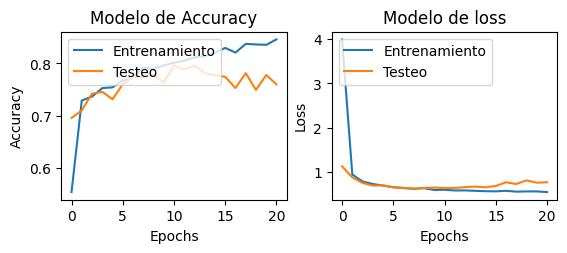

10/10 [==============================] - 1s 130ms/step


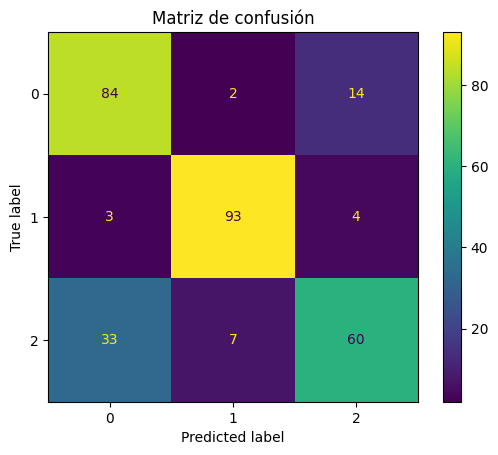

10/10 [==============================] - 2s 162ms/step


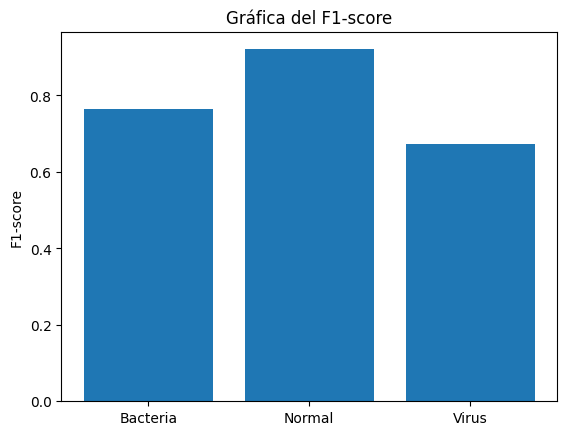

10/10 [==============================] - 2s 201ms/step


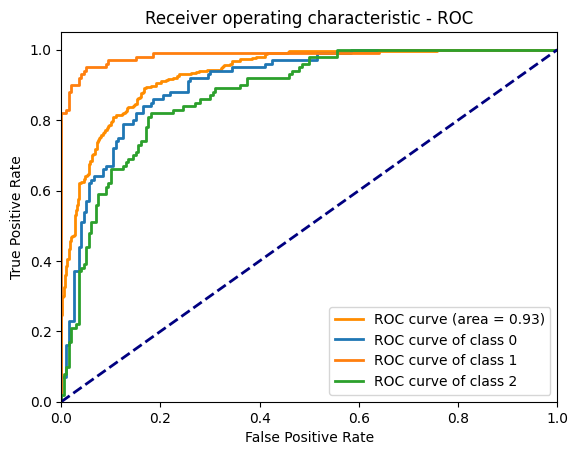

In [ ]:
# GRÁFICO DE ACCURACY
plt.subplot(2, 2, 1)
plt.plot(SecondTraining.history['accuracy'])
plt.plot(SecondTraining.history['val_accuracy'])
plt.title("Modelo de Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')

#-------------------------------------------------------------------------------

# GRÁFICO DE LOSS
plt.subplot(2, 2, 2)
plt.plot(SecondTraining.history['loss'])
plt.plot(SecondTraining.history['val_loss'])
plt.title("Modelo de loss")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Entrenamiento', 'Testeo'], loc='upper left')
plt.show()

#-------------------------------------------------------------------------------

# GRÁFICO DE MATRIZ DE CONFUSIÓN
y_pred_CM2 = SecondTraining.predict(X_test)
result2 = confusion_matrix(y_test, y_pred_CM.argmax(axis=1))
disp2 = ConfusionMatrixDisplay(result)
disp2.plot()
plt.title("Matriz de confusión")
plt.show()

#-------------------------------------------------------------------------------

#GRÁFICO DE F1

y_pred_F1_2 = SecondTraining.predict(X_test)
y_pred_F1_2 = np.argmax(y_pred_F1_2, axis=1)
report2 = classification_report(y_test, y_pred_F1_2, output_dict=True)

# Obtener las métricas de interés
f1_score2 = [report[str(i)]['f1-score'] for i in range(3)]

fig2, ax2 = plt.subplots()
ax.bar(range(3), f1_score2)
ax.set_xticks(range(3))
ax.set_xticklabels(['Bacteria', 'Normal', 'Virus'])
ax.set_ylabel('F1-score')
ax.set_title('Gráfica del F1-score')
plt.show()

#-------------------------------------------------------------------------------

#GRÁFICO DE ROC AUC
y_pred_ROCAUC2 = SecondTraining.predict(X_test)
y_test_binario2 = to_categorical(y_test)

# Calcula la curva ROC para cada clase
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in range(3):
    fpr2[i], tpr2[i], _ = roc_curve(y_test_binario2[:, i], y_pred_ROCAUC2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Calcula la curva ROC micro
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_test_binario2.ravel(), y_pred_ROCAUC2.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])

# Grafica la curva ROC
plt.figure()
lw2 = 2
plt.plot(fpr2["micro"], tpr2["micro"], color='darkorange',
         lw=lw2, label='ROC curve (area = %0.2f)' % roc_auc2["micro"])
for i in range(3):
    plt.plot(fpr2[i], tpr2[i], lw=lw2,
             label="ROC curve of class {}".format(i))

plt.plot([0, 1], [0, 1], color='navy', lw=lw2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - ROC')
plt.legend(loc="lower right")
plt.show()

"loss: 0.4548 - accuracy: 0.8100": Aquí se muestran las métricas de pérdida y precisión (accuracy) en el conjunto de prueba. Estos valores son los resultados de la evaluación del modelo en los datos de prueba.

"loss: 0.4548" indica que la pérdida promedio en el conjunto de prueba es aproximadamente 0.4548. La pérdida es una medida de qué tan bien se están haciendo las predicciones del modelo, y en general, se busca que sea lo más bajo posible.
"accuracy: 0.8100" indica que la precisión promedio en el conjunto de prueba es aproximadamente 0.8100 o 81%. Esto significa que el modelo acertó en alrededor del 81% de las predicciones en el conjunto de prueba. La precisión es una medida de qué tan bien el modelo clasifica los datos.
En resumen, el resultado muestra el progreso de la evaluación de los lotes, el tiempo que tomó y las métricas de pérdida y precisión en el conjunto de prueba. En este caso, el modelo obtuvo una pérdida de aproximadamente 0.4548 y una precisión de aproximadamente 81% en el conjunto de prueba.

In [ ]:
loss2, acc2 = transferLearning_model.evaluate(X_test, y_test, verbose=1)
print("The loss is: {0}, and the accuracy is: {1}".format(loss2, acc2))

10/10 [==============================] - 4s 190ms/step - loss: 0.4548 - accuracy: 0.8100
The loss is: 0.4547780454158783, and the accuracy is: 0.8100000023841858
